<a href="https://colab.research.google.com/github/berthe06/TP2MGL870/blob/main/HDFS_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Partie I: Preparation des données**



In [1]:
from google.colab import drive

In [2]:
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [3]:
### Importation des bibliothèques générales que nous utiliserons dans ce notebook
import numpy as np # algèbre linéaire
import pandas as pd # traitement des données, I/O de fichier CSV (par ex. pd.read_csv)
import seaborn as sns # bibliothèque de tracé qui utilise matplot
import matplotlib.pyplot as plt # pour tracer certains paramètres dans seaborn
from sklearn.neighbors import KNeighborsClassifier

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer


# Importer LabelEncoder depuis sklearn.preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
import pandas as pd

# Importer

import matplotlib.pyplot as plt
import numpy as np




# Chargement des données
df = pd.read_csv('/content/drive/MyDrive/TP2/Event_occurrence_matrix.csv')



df.head()

,BlockId,Label,Type,E1,E2,E3,E4,E5,E6,E7,...,E20,E21,E22,E23,E24,E25,E26,E27,E28,E29
0,blk_-1608999687919862906,Success,NaN,0,0,203,0,10,7,0,...,0,10,1,10,0,4,10,0,0,0
1,blk_7503483334202473044,Success,NaN,0,2,1,0,3,0,0,...,0,3,1,3,0,0,3,0,0,0
2,blk_-3544583377289625738,Fail,21.0,0,0,203,0,3,0,0,...,1,3,1,3,0,0,3,0,0,0
3,blk_-9073992586687739851,Success,NaN,0,3,0,0,3,0,0,...,0,3,1,3,0,0,3,0,0,0
4,blk_7854771516489510256,Success,NaN,0,3,1,15,3,0,0,...,0,3,1,3,0,0,3,0,0,0


In [4]:
# 1. Preparation des donnees
#Encodage des Étiquettes de Succès/Échec


# Encodage de la colonne "Label"
df['Label'] = df['Label'].map({'Success': 0, 'Fail': 1})


print(df)

                         BlockId  Label  Type  E1  E2   E3  E4  E5  E6  E7  \
0       blk_-1608999687919862906      0   NaN   0   0  203   0  10   7   0   
1        blk_7503483334202473044      0   NaN   0   2    1   0   3   0   0   
2       blk_-3544583377289625738      1  21.0   0   0  203   0   3   0   0   
3       blk_-9073992586687739851      0   NaN   0   3    0   0   3   0   0   
4        blk_7854771516489510256      0   NaN   0   3    1  15   3   0   0   
...                          ...    ...   ...  ..  ..  ...  ..  ..  ..  ..   
575056   blk_1019720114020043203      0   NaN   0   0    0   0   3   0   0   
575057  blk_-2683116845478050414      0   NaN   0   0    0   0   3   0   0   
575058   blk_5595059397348477632      0   NaN   0   0    0   0   3   0   0   
575059   blk_1513937873877967730      0   NaN   0   0    0   0   3   0   0   
575060  blk_-9128742458709757181      1   4.0   0   0    0   0   3   0   0   

        ...  E20  E21  E22  E23  E24  E25  E26  E27  E28  E29  

In [5]:
# 2.
print(df.columns)  # Affiche toutes les colonnes du DataFrame
# print(df.dtypes)   # Affiche les types de chaque colonne



Index(['BlockId', 'Label', 'Type', 'E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7',
       'E8', 'E9', 'E10', 'E11', 'E12', 'E13', 'E14', 'E15', 'E16', 'E17',
       'E18', 'E19', 'E20', 'E21', 'E22', 'E23', 'E24', 'E25', 'E26', 'E27',
       'E28', 'E29'],
      dtype='object')


Valeurs manquantes par colonne:
 BlockId         0
Label           0
Type       558223
E1              0
E2              0
E3              0
E4              0
E5              0
E6              0
E7              0
E8              0
E9              0
E10             0
E11             0
E12             0
E13             0
E14             0
E15             0
E16             0
E17             0
E18             0
E19             0
E20             0
E21             0
E22             0
E23             0
E24             0
E25             0
E26             0
E27             0
E28             0
E29             0
dtype: int64

Visualisation des valeurs manquantes:


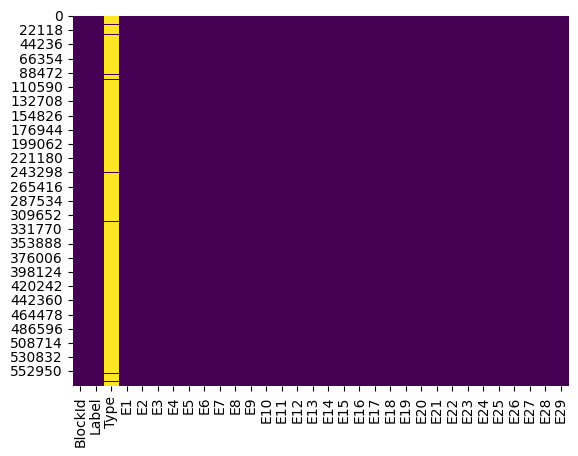

In [6]:
# 3. Vérifier s'il existe des valeurs manquantes

# a. Utiliser isnull() et sum()
missing_values = df.isnull().sum()
print("Valeurs manquantes par colonne:\n", missing_values)

# b. Utiliser heatmap() de seaborn
print("\nVisualisation des valeurs manquantes:")
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.show()

In [7]:
# 4. Supprimer la colonne 'Type'

#df = df.drop(columns=['Type'])
# Afficher le DataFrame transformé
print(df)

                         BlockId  Label  Type  E1  E2   E3  E4  E5  E6  E7  \
0       blk_-1608999687919862906      0   NaN   0   0  203   0  10   7   0   
1        blk_7503483334202473044      0   NaN   0   2    1   0   3   0   0   
2       blk_-3544583377289625738      1  21.0   0   0  203   0   3   0   0   
3       blk_-9073992586687739851      0   NaN   0   3    0   0   3   0   0   
4        blk_7854771516489510256      0   NaN   0   3    1  15   3   0   0   
...                          ...    ...   ...  ..  ..  ...  ..  ..  ..  ..   
575056   blk_1019720114020043203      0   NaN   0   0    0   0   3   0   0   
575057  blk_-2683116845478050414      0   NaN   0   0    0   0   3   0   0   
575058   blk_5595059397348477632      0   NaN   0   0    0   0   3   0   0   
575059   blk_1513937873877967730      0   NaN   0   0    0   0   3   0   0   
575060  blk_-9128742458709757181      1   4.0   0   0    0   0   3   0   0   

        ...  E20  E21  E22  E23  E24  E25  E26  E27  E28  E29  

Label
0    558223
1     16838
Name: count, dtype: int64


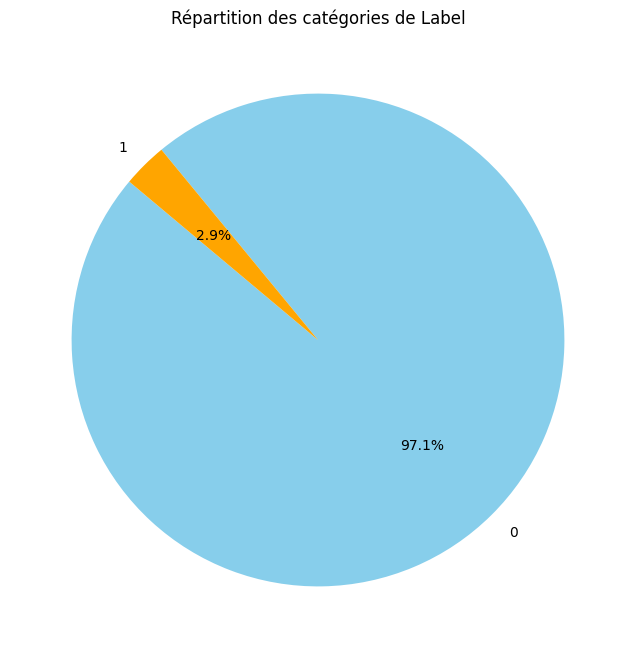

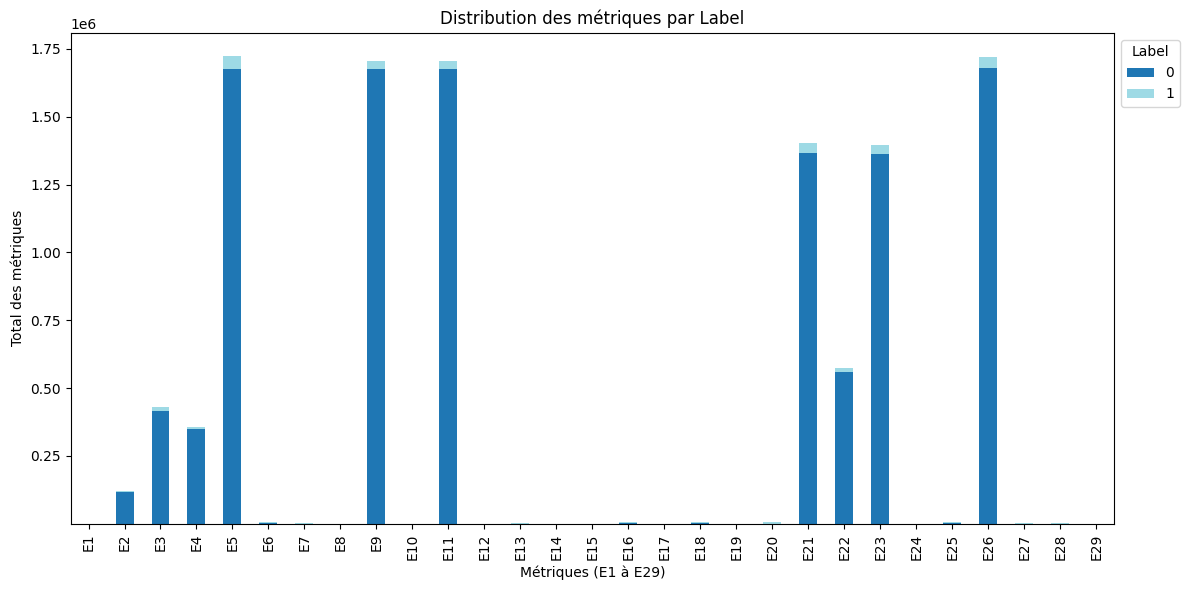

In [8]:
# 5. Analyse des distributions


# Quelle est la distribution de la variable `Label`?
print(df['Label'].value_counts())

# Agréger les données par 'Label'
metrics_columns = [col for col in df.columns if col.startswith('E')]
aggregated = df.groupby('Label')[metrics_columns].sum()

# Calculer la répartition globale des 'Label'
label_counts = df['Label'].value_counts(normalize=True) * 100

# Tracer le camembert pour les 'Label'
plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'orange'])
plt.title("Répartition des catégories de Label")
plt.show()

# Tracer un diagramme empilé pour les métriques par Label
aggregated.T.plot(kind='bar', stacked=True, figsize=(12, 6), colormap="tab20")
plt.title("Distribution des métriques par Label")
plt.ylabel("Total des métriques")
plt.xlabel("Métriques (E1 à E29)")
plt.legend(title="Label", loc="upper left", bbox_to_anchor=(1.0, 1.0))
plt.tight_layout()
plt.show()

In [9]:
#6. Standardisation des colones

#Transformer les données pour que toutes les colonnes aient une moyenne de 0 et un écart type de 1.
#Elle évite que les colonnes avec des valeurs élevées (comme E3=203) dominent les colonnes avec de petites valeurs (comme E2=1).

# Extraction des colonnes d'occurrences d'événements
event_columns = [col for col in df.columns if col.startswith('E')]

# Standardisation des colonnes d'événements
scaler = StandardScaler()
df[event_columns] = scaler.fit_transform(df[event_columns])

# Calcul de la matrice de corrélation
correlation_matrix = df[event_columns + ['Label']].corr()

# Affichage des corrélations avec l'étiquette "Label"
correlation_with_label = correlation_matrix['Label'].sort_values(ascending=False)
print(correlation_with_label)

Label    1.000000
E20      0.525625
E7       0.424132
E25      0.312341
E18      0.312341
E16      0.309967
E6       0.299926
E28      0.261382
E27      0.236291
E13      0.167802
E10      0.057136
E14      0.056430
E29      0.050982
E8       0.050169
E15      0.045243
E12      0.036509
E17      0.022779
E1       0.016978
E24      0.015186
E19      0.014349
E3      -0.002914
E2      -0.006852
E4      -0.013955
E21     -0.048586
E23     -0.078124
E5      -0.210662
E26     -0.254904
E11     -0.597808
E9      -0.602635
E22           NaN
Name: Label, dtype: float64


              Label          Type        E1        E2        E3        E4  \
Label  1.000000e+00 -1.636278e-15  0.016978 -0.006852 -0.002914 -0.013955   
Type  -1.636278e-15  1.000000e+00  0.016139 -0.015008 -0.016814 -0.012284   
E1     1.697808e-02  1.613917e-02  1.000000 -0.001060 -0.000873 -0.001138   
E2    -6.851559e-03 -1.500791e-02 -0.001060  1.000000  0.052397  0.297072   
E3    -2.914498e-03 -1.681363e-02 -0.000873  0.052397  1.000000  0.398551   
E4    -1.395505e-02 -1.228375e-02 -0.001138  0.297072  0.398551  1.000000   
E5    -2.106624e-01 -2.770510e-01  0.037419  0.035888  0.135036  0.028201   
E6     2.999256e-01 -2.212744e-01  0.015808  0.015076  0.169169  0.000752   
E7     4.241316e-01  7.808454e-01 -0.000217 -0.025627 -0.019418 -0.027644   
E8     5.016870e-02  9.673078e-03 -0.000026 -0.002520 -0.001309 -0.002034   
E9    -6.026351e-01 -4.429106e-01  0.000309  0.037587  0.030943  0.040345   
E10    5.713644e-02  1.251675e-02  0.155773 -0.001985 -0.001150 -0.001827   

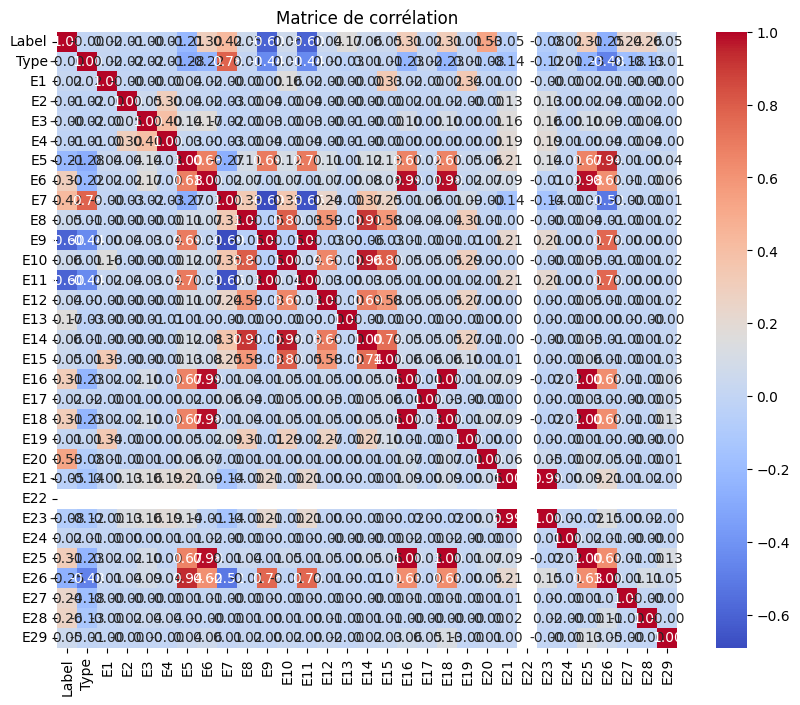

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrer les colonnes numériques
df_numeric = df.select_dtypes(include=[float, int])

# Gérer les valeurs manquantes, ici on remplace les NaN par la moyenne
df_filled = df_numeric.fillna(df_numeric.mean())

# Calculer la matrice de corrélation
corr_matrix = df_filled.corr()


# Affichage de la matrice de corrélation
print(corr_matrix)

# Création de la heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

# Ajouter un titre
plt.title("Matrice de corrélation")
plt.show()


# Exemple de visualisation avec seaborn
#plt.figure(figsize=(12, 8))
#sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
#plt.title("Matrice de Corrélation")
#plt.show()



In [12]:
# Liste des colonnes à supprimer
colonnes_a_supprimer = ['Type','E2', 'E3', 'E4', 'E7', 'E8', 'E16', 'E22']

# Supprimer les colonnes
df = df.drop(columns=colonnes_a_supprimer)

# Afficher les premières lignes pour vérifier
print(df.head())

# Sauvegarder le dataset modifié si nécessaire
df.to_csv('dataset_modifie.csv', index=False)


                    BlockId  Label        E1         E5         E6        E9  \
0  blk_-1608999687919862906      0 -0.002949  31.702076  47.560129  0.104664   
1   blk_7503483334202473044      0 -0.002949   0.015358  -0.083999  0.104664   
2  blk_-3544583377289625738      1 -0.002949   0.015358  -0.083999  0.104664   
3  blk_-9073992586687739851      0 -0.002949   0.015358  -0.083999  0.104664   
4   blk_7854771516489510256      0 -0.002949   0.015358  -0.083999  0.104664   

        E10       E11       E12       E13  ...       E19       E20       E21  \
0 -0.009923  0.103825 -0.006341 -0.029143  ... -0.002492 -0.095216  6.384117   
1 -0.009923  0.103825 -0.006341 -0.029143  ... -0.002492 -0.095216  0.474395   
2 -0.009923  0.103825 -0.006341 -0.029143  ... -0.002492  9.779436  0.474395   
3 -0.009923  0.103825 -0.006341 -0.029143  ... -0.002492 -0.095216  0.474395   
4 -0.009923  0.103825 -0.006341 -0.029143  ... -0.002492 -0.095216  0.474395   

        E23       E24        E25      

In [13]:
# Séparer les features (X) et la cible (y)
X = df.drop(columns=['BlockId', 'Label'])  # Exclure BlockId et la cible
y = df['Label']  # Cible

# Vérifiez les données
print(X.head())


         E1         E5         E6        E9       E10       E11       E12  \
0 -0.002949  31.702076  47.560129  0.104664 -0.009923  0.103825 -0.006341   
1 -0.002949   0.015358  -0.083999  0.104664 -0.009923  0.103825 -0.006341   
2 -0.002949   0.015358  -0.083999  0.104664 -0.009923  0.103825 -0.006341   
3 -0.002949   0.015358  -0.083999  0.104664 -0.009923  0.103825 -0.006341   
4 -0.002949   0.015358  -0.083999  0.104664 -0.009923  0.103825 -0.006341   

        E13       E14       E15  ...       E19       E20       E21       E23  \
0 -0.029143 -0.009801 -0.007858  ... -0.002492 -0.095216  6.384117  6.402695   
1 -0.029143 -0.009801 -0.007858  ... -0.002492 -0.095216  0.474395  0.483770   
2 -0.029143 -0.009801 -0.007858  ... -0.002492  9.779436  0.474395  0.483770   
3 -0.029143 -0.009801 -0.007858  ... -0.002492 -0.095216  0.474395  0.483770   
4 -0.029143 -0.009801 -0.007858  ... -0.002492 -0.095216  0.474395  0.483770   

        E24        E25        E26       E27       E28   

# **Partie II: Construction du modèle**

In [14]:
# 1. Diviser les données en ensembles d’entraînement, de test et de validation


# Étape 1 : Identifier les colonnes valides (événements)
event_columns = [col for col in df.columns if col.startswith('E') and col in df.columns]

# Vérification des colonnes valides
if not event_columns:
    raise ValueError("Aucune colonne d'événement valide n'est disponible. Vérifiez vos données.")
else:
    print(f"Colonnes d'événements utilisées : {event_columns}")

# Caractéristiques et étiquette
X = df[event_columns]  # Colonnes des événements restantes
if 'Label' not in df.columns:
    raise KeyError("La colonne 'Label' est absente du DataFrame.")
y = df['Label']  # L'étiquette de succès ou d'échec

# Étape 2 : Diviser les données en ensembles d'entraînement, de validation et de test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 20% pour le test
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3, random_state=42)  # 30% du reste pour la validation

# Étape 3 : Imputer les valeurs manquantes par la moyenne
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_val = imputer.transform(X_val)
X_test = imputer.transform(X_test)

# Étape 4 : Vérification des tailles des ensembles
print(f"Taille de l'ensemble d'entraînement : {X_train.shape}")
print(f"Taille de l'ensemble de validation : {X_val.shape}")
print(f"Taille de l'ensemble de test : {X_test.shape}")


Colonnes d'événements utilisées : ['E1', 'E5', 'E6', 'E9', 'E10', 'E11', 'E12', 'E13', 'E14', 'E15', 'E17', 'E18', 'E19', 'E20', 'E21', 'E23', 'E24', 'E25', 'E26', 'E27', 'E28', 'E29']
Taille de l'ensemble d'entraînement : (322033, 22)
Taille de l'ensemble de validation : (138015, 22)
Taille de l'ensemble de test : (115013, 22)


In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Fonction pour évaluer les modèles
def evaluate_model(y_true, y_pred, model_name="Model"):
    """Évalue un modèle et retourne les métriques principales."""
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_pred)

    print(f"Performance de {model_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"AUC: {auc:.4f}")
    print('-' * 30)

    return auc, precision, recall

# 1. Modèle Logistic Regression
lr = LogisticRegression(random_state=42, max_iter=500)
lr.fit(X_train, y_train)

# Évaluation sur l'ensemble de validation
y_val_pred_lr = lr.predict(X_val)
print("Résultats sur l'ensemble de validation pour Logistic Regression :")
auc_lr, precision_lr, recall_lr = evaluate_model(y_val, y_val_pred_lr, "Logistic Regression")

# Évaluation sur l'ensemble de test
y_test_pred_lr = lr.predict(X_test)
print("Résultats sur l'ensemble de test pour Logistic Regression :")
auc_lr_test, precision_lr_test, recall_lr_test = evaluate_model(y_test, y_test_pred_lr, "Logistic Regression")

# 2. Modèle Random Forest
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)

# Évaluation sur l'ensemble de validation
y_val_pred_rf = rf.predict(X_val)
print("Résultats sur l'ensemble de validation pour Random Forest :")
auc_rf, precision_rf, recall_rf = evaluate_model(y_val, y_val_pred_rf, "Random Forest")

# Évaluation sur l'ensemble de test
y_test_pred_rf = rf.predict(X_test)
print("Résultats sur l'ensemble de test pour Random Forest :")
auc_rf_test, precision_rf_test, recall_rf_test = evaluate_model(y_test, y_test_pred_rf, "Random Forest")






Résultats sur l'ensemble de validation pour Logistic Regression :
Performance de Logistic Regression:
Accuracy: 0.9992
Precision: 0.9769
Recall: 0.9970
AUC: 0.9982
------------------------------
Résultats sur l'ensemble de test pour Logistic Regression :
Performance de Logistic Regression:
Accuracy: 0.9994
Precision: 0.9829
Recall: 0.9970
AUC: 0.9982
------------------------------
Résultats sur l'ensemble de validation pour Random Forest :
Performance de Random Forest:
Accuracy: 0.9993
Precision: 0.9782
Recall: 0.9993
AUC: 0.9993
------------------------------
Résultats sur l'ensemble de test pour Random Forest :
Performance de Random Forest:
Accuracy: 0.9995
Precision: 0.9835
Recall: 0.9994
AUC: 0.9995
------------------------------


In [ ]:
#Optimisation des hyperparametres

from sklearn.model_selection import GridSearchCV

# Exemple pour Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3)
grid_search.fit(X_train, y_train)

print("Meilleurs paramètres pour Random Forest :", grid_search.best_params_)


# **Partie III: Interprétation du modèle AiOPs**

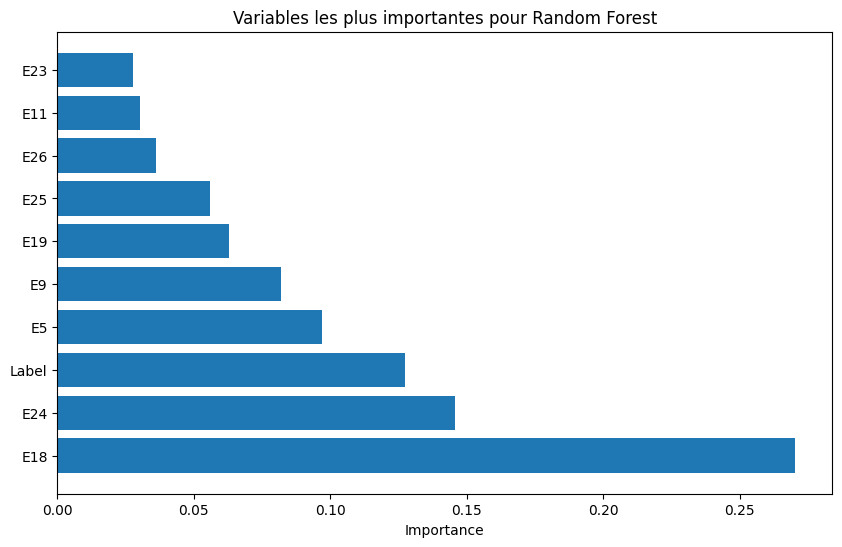

In [ ]:


feature_importance = rf.feature_importances_
indices = np.argsort(feature_importance)[::-1]  # Tri des variables par ordre décroissant
features =df.columns
# Affichage des 10 variables les plus importantes
plt.figure(figsize=(10, 6))
plt.barh(features[indices][:10], feature_importance[indices][:10])
plt.xlabel('Importance')
plt.title('Variables les plus importantes pour Random Forest')
plt.show()
